[View in Colaboratory](https://colab.research.google.com/github/onepixelm/hazi03/blob/master/Dixy3.ipynb)

In [2]:
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

from keras.models import Sequential
from keras.layers.core import Dense
from keras.optimizers import SGD

Using TensorFlow backend.


In [0]:
def diff_true_pred(y_true, y_pred):
  return abs(y_true - y_pred)

model = Sequential()
model.add(Dense(50, activation='relu', input_shape=(100,)))
model.add(Dense(50, activation='relu'))
model.add(Dense(1, activation='linear'))

model.compile(loss='mean_squared_error', optimizer=SGD(lr=0.001), metrics=[diff_true_pred])

In [4]:
from google.colab import files

uploaded = files.upload()
file  = open("BP_d.txt", 'r')  
head = file.readlines()[1:] 
file.close()


Saving BP_d.txt to BP_d.txt


In [23]:
head2 = [ float(s.split(';')[1]) for s in head ]
print(len(head2))

min_temp = head2[0]
max_temp = head2[0]
for t in head2:
  if t < min_temp:
    min_temp = t
  if t > max_temp:
    max_temp = t
print("Min temp: {} Max temp: {}".format(min_temp,max_temp))
X_pred = (np.asarray([head2[-100:]]) - min_temp)/(max_temp - min_temp)
print(X_pred)
print(X_pred.shape)
head2 = [ head2[i*101:(i+1)*101] for i in range(len(head2)/101) ]
Y_temp = [ l[-1:] for l in head2 ]
#print(Y_temp)
X_temp = [ l[:-1] for l in head2 ]
#print(X_temp)

40177
Min temp: -20.6 Max temp: 33.1
[[0.68156425 0.7113594  0.7132216  0.6443203  0.6405959  0.63873371
  0.61080074 0.5698324  0.57728119 0.60893855 0.61266294 0.60148976
  0.5716946  0.61080074 0.60893855 0.5698324  0.55307263 0.5735568
  0.57914339 0.57541899 0.5679702  0.5679702  0.56424581 0.58845438
  0.57914339 0.56238361 0.56052142 0.55307263 0.52513966 0.53258845
  0.53631285 0.58286778 0.58472998 0.4972067  0.48230912 0.48417132
  0.4990689  0.50651769 0.52886406 0.54934823 0.57728119 0.59404097
  0.63873371 0.65363128 0.6443203  0.60893855 0.60893855 0.60521415
  0.59031657 0.55493482 0.58472998 0.62383613 0.63687151 0.65735568
  0.62011173 0.63500931 0.59404097 0.5735568  0.54748603 0.54376164
  0.56238361 0.51396648 0.47858473 0.48230912 0.4320298  0.40968343
  0.40037244 0.43389199 0.39106145 0.37057728 0.41154562 0.39292365
  0.3556797  0.34636872 0.45437616 0.54003724 0.54376164 0.46368715
  0.37802607 0.36685289 0.44320298 0.37243948 0.30540037 0.33519553
  0.30726257

In [6]:
import numpy as np
X_train = (np.asarray(X_temp[0:300]) - min_temp)/(max_temp - min_temp)
Y_train = (np.asarray(Y_temp[0:300]) - min_temp)/(max_temp - min_temp)
X_test = (np.asarray(X_temp[300:]) - min_temp)/(max_temp - min_temp)
Y_test = (np.asarray(Y_temp[300:]) - min_temp)/(max_temp - min_temp)

print(X_train.shape)
print(X_test.shape)
print(Y_train.shape)
print(Y_test.shape)

(300, 100)
(97, 100)
(300, 1)
(97, 1)


In [7]:
network_history = model.fit(X_train, Y_train, batch_size=60, epochs=200, verbose=1, validation_split=0.2)

Train on 240 samples, validate on 60 samples
Epoch 1/200
240/240 [==============================] - 0s 500us/step - loss: 0.0291 - diff_true_pred: 0.1455 - val_loss: 0.0296 - val_diff_true_pred: 0.1483
Epoch 2/200
240/240 [==============================] - 0s 64us/step - loss: 0.0288 - diff_true_pred: 0.1446 - val_loss: 0.0292 - val_diff_true_pred: 0.1473
Epoch 3/200
240/240 [==============================] - 0s 62us/step - loss: 0.0285 - diff_true_pred: 0.1436 - val_loss: 0.0288 - val_diff_true_pred: 0.1464
Epoch 4/200
240/240 [==============================] - 0s 56us/step - loss: 0.0281 - diff_true_pred: 0.1425 - val_loss: 0.0285 - val_diff_true_pred: 0.1455
Epoch 5/200
240/240 [==============================] - 0s 72us/step - loss: 0.0278 - diff_true_pred: 0.1417 - val_loss: 0.0281 - val_diff_true_pred: 0.1447
Epoch 6/200
240/240 [==============================] - 0s 66us/step - loss: 0.0274 - diff_true_pred: 0.1409 - val_loss: 0.0278 - val_diff_true_pred: 0.1438
Epoch 7/200
240/24

In [0]:
def plot_history(network_history):

  plt.figure()

  plt.xlabel('Epochs')

  plt.ylabel('Loss')
  plt.plot(network_history.history['loss'])
  plt.plot(network_history.history['val_loss'])
  plt.legend(['Training', 'Validation'])
  plt.figure()
  plt.xlabel('Epochs')
  plt.ylabel('Accuracy')
  plt.plot(network_history.history['diff_true_pred'])
  plt.plot(network_history.history['val_diff_true_pred'])
  plt.legend(['Training', 'Validation'])
  plt.show()

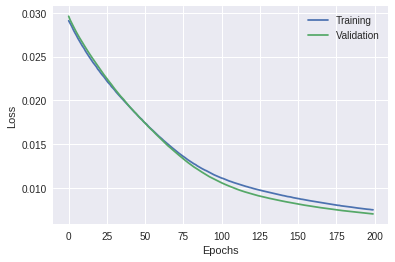

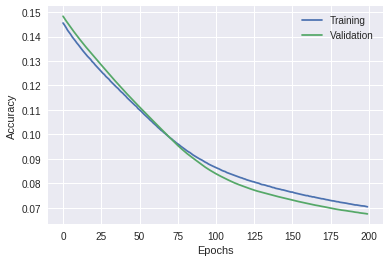

In [9]:
plot_history(network_history)

In [12]:
preds = model.predict(X_test)
print(preds.shape)

(97, 1)


In [13]:
for t in [ (preds[i][0]*(max_temp-min_temp)+min_temp, Y_test[i][0]*(max_temp-min_temp)+min_temp,(preds[i][0] - Y_test[i][0] )*(max_temp-min_temp) ) for i in range(97) ]:
  print(t)

(3.668496239185334, 11.199999999999996, -7.5315037608146636)
(18.75917344689369, 15.399999999999999, 3.3591734468936942)
(16.87085711956024, 11.800000000000004, 5.07085711956024)
(1.4835678100585952, 3.5, -2.016432189941408)
(7.784279221296309, 9.399999999999999, -1.6157207787036878)
(20.10802249312401, 25.300000000000004, -5.191977506875994)
(4.461137980222702, 5.399999999999999, -0.9388620197772974)
(-3.4031813025474555, 0.10000000000000142, -3.503181302547457)
(18.802799934148787, 16.9, 1.9027999341487893)
(15.517542999982837, 15.5, 0.017542999982833186)
(2.503332948684694, 8.3, -5.7966670513153105)
(0.594294840097426, 8.599999999999998, -8.005705159902572)
(23.35347465872765, 25.1, -1.7465253412723567)
(12.415555721521379, 4.5, 7.915555721521377)
(1.658208191394806, 6.600000000000001, -4.9417918086051955)
(12.862930464744565, 18.800000000000004, -5.937069535255438)
(17.879480379819867, 18.0, -0.12051962018013103)
(4.145884597301482, 3.5, 0.6458845973014817)
(5.487707954645156, 12.1

In [17]:
preds = model.predict(X_pred)
print(preds,max_temp,min_temp)                                    # a következő napi predikált előrejelzés
print('the next day prediction:', preds*(max_temp-min_temp)+min_temp) # a következő napi predikált előrejelzés már renormálva

#preds_renorm = preds*(max_temp-min_temp)+min_temp

(array([[0.35450697]], dtype=float32), 33.1, -20.6)
('the next day prediction:', array([[-1.5629749]], dtype=float32))


In [38]:
for week in range (1,7):
    
    preds = model.predict(X_pred)
    X_pred_new = np.concatenate((X_pred, preds), axis=1)
    X_pred = np.delete(X_pred_new, 0, 1)
    
    print('the next day prediction', week, preds)

print('the next week prediction:', preds*(max_temp-min_temp)+min_temp) # a következő napi predikált előrejelzés már renormálva


('the next day prediction', 1, array([[0.5962648]], dtype=float32))
('the next day prediction', 2, array([[0.5668092]], dtype=float32))
('the next day prediction', 3, array([[0.565301]], dtype=float32))
('the next day prediction', 4, array([[0.5330801]], dtype=float32))
('the next day prediction', 5, array([[0.4905122]], dtype=float32))
('the next day prediction', 6, array([[0.44766837]], dtype=float32))
('the next week prediction:', array([[3.4397907]], dtype=float32))
